In [58]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [59]:
World_data=pd.read_csv('Word_data.csv')
country_data=pd.read_csv('Countries_data.csv')

In [60]:
country_data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,9.0,0.0,0.0,0.0,...,2.5,597.029,9.59,6.3,33.1,37.746,0.5,64.83,0.511,41128772
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,9.0,0.0,0.0,0.0,...,2.5,597.029,9.59,6.3,33.1,37.746,0.5,64.83,0.511,41128772
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,9.0,0.0,0.0,0.0,...,2.5,597.029,9.59,6.3,33.1,37.746,0.5,64.83,0.511,41128772
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,9.0,0.0,0.0,0.0,...,2.5,597.029,9.59,6.3,33.1,37.746,0.5,64.83,0.511,41128772
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,9.0,0.0,0.0,0.0,...,2.5,597.029,9.59,6.3,33.1,37.746,0.5,64.83,0.511,41128772


In [1]:


# Bước 1: Đọc file CSV chứa thông tin lãnh thổ
territory_info_path = 'country-codes.csv'  # Thay đường dẫn thực tế
df_territory = pd.read_csv(territory_info_path)



# Bước 3: Lấy tổng số ca nhiễm lớn nhất cho mỗi quốc gia
df_cases = country_data.groupby('iso_code')['total_cases'].max().reset_index()

# Bước 4: Kết hợp dữ liệu COVID-19 với thông tin lãnh thổ (dựa trên mã quốc gia)
df_merged = df_cases.merge(df_territory, left_on='iso_code', right_on='ISO3166-1-Alpha-3', how='left')

# Bước 5: Tạo bản đồ choropleth với Plotly Express
fig = px.choropleth(df_merged,
                    locations='iso_code',
                    color='total_cases',
                    hover_name='official_name_en',
                    color_continuous_scale='Reds',
                    title='World COVID-19 Heatmap (Max Total Cases per Country)',
                    projection='natural earth')  # Hiển thị bản đồ thế giới

fig.show()


NameError: name 'pd' is not defined

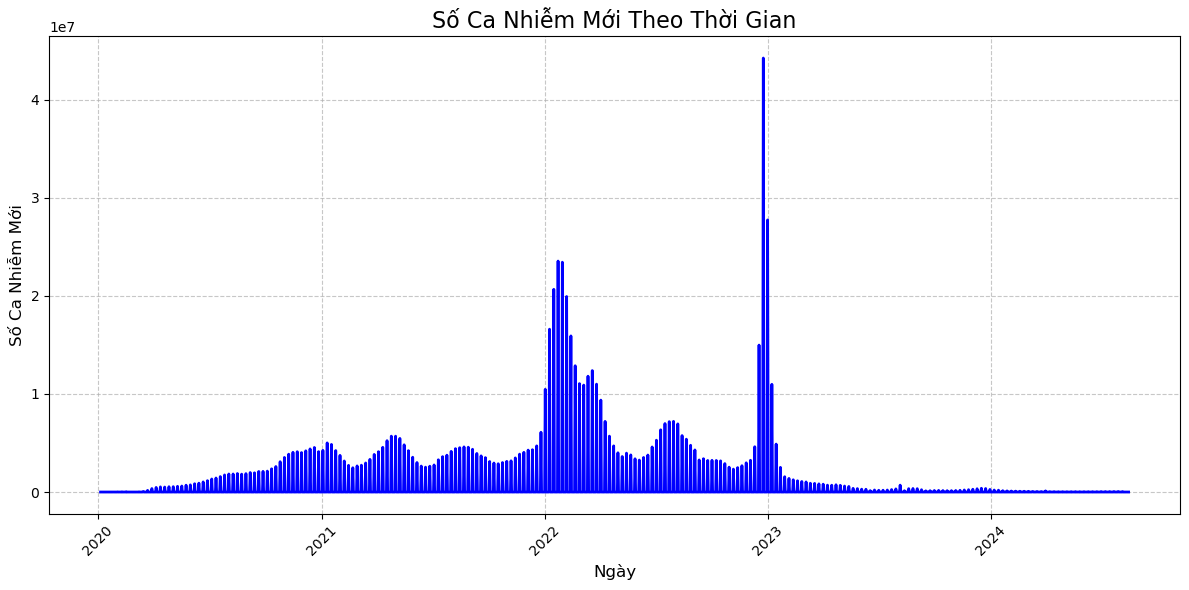

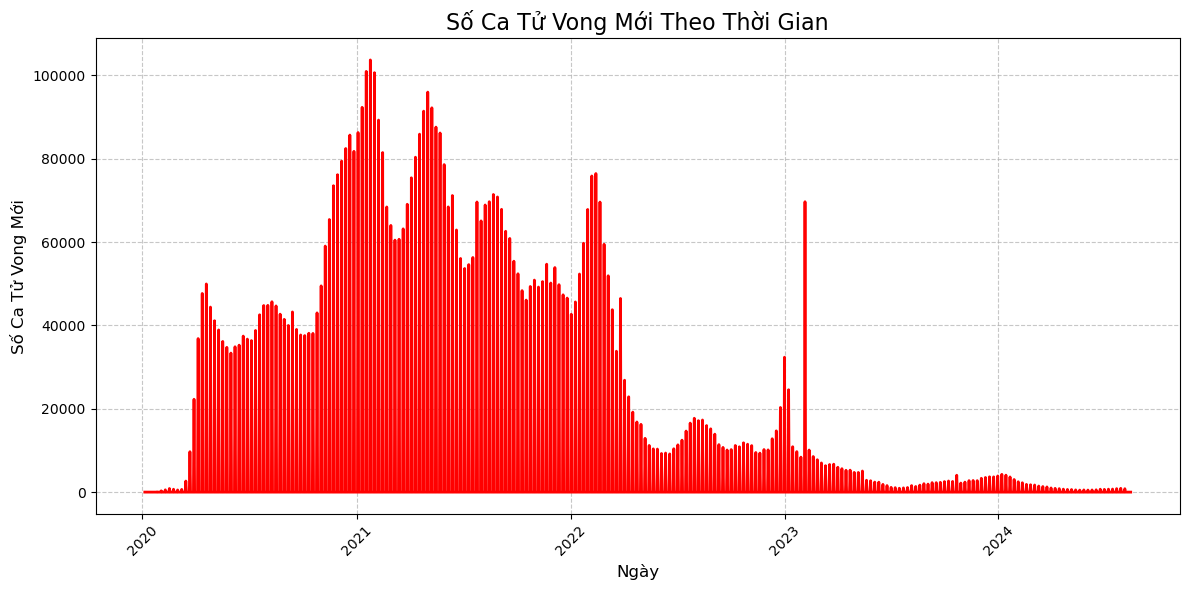

In [62]:

World_data['date'] = pd.to_datetime(World_data['date'])

# Tính toán số ca nhiễm và tử vong theo thời gian và tích lũy
cases_over_time = World_data.groupby('date')['new_cases'].sum().reset_index()  # Use 'new_cases'
deaths_over_time = World_data.groupby('date')['new_deaths'].sum().reset_index()  # Use 'new_deaths'
cases_over_time['CumulativeCases'] = cases_over_time['new_cases'].cumsum()
deaths_over_time['CumulativeDeaths'] = deaths_over_time['new_deaths'].cumsum()

# --- Biểu đồ 1: Số ca nhiễm mới theo thời gian ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', data=cases_over_time, color='blue', linewidth=2)  # Blue color, thicker line
plt.title('Số Ca Nhiễm Mới Theo Thời Gian', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Ca Nhiễm Mới', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()

# --- Biểu đồ 2: Số ca tử vong mới theo thời gian ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_deaths', data=deaths_over_time, color='red', linewidth=2)  # Red color, thicker line
plt.title('Số Ca Tử Vong Mới Theo Thời Gian', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Ca Tử Vong Mới', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()



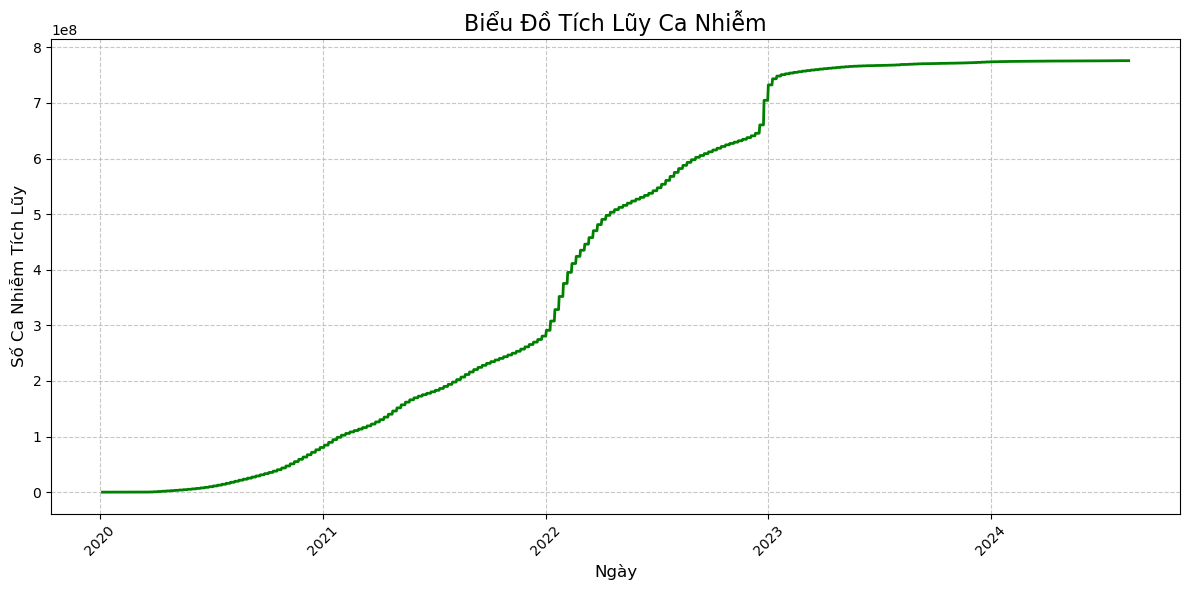

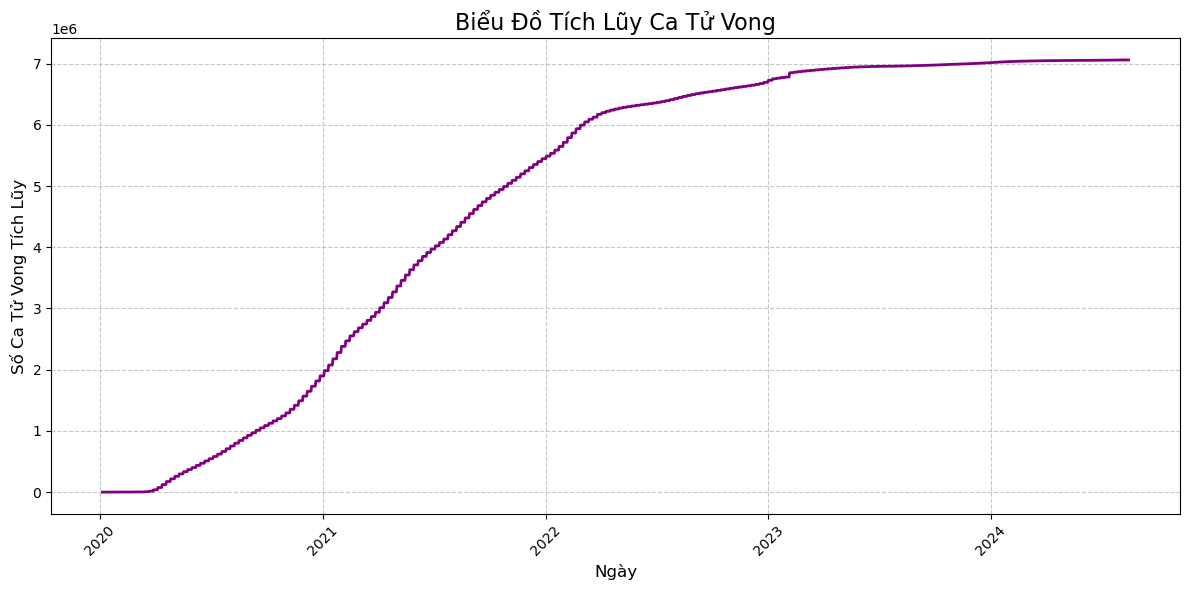

In [63]:
# --- Biểu đồ 3: Tích lũy ca nhiễm ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='CumulativeCases', data=cases_over_time, color='green', linewidth=2)  # Green color, thicker line
plt.title('Biểu Đồ Tích Lũy Ca Nhiễm', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Ca Nhiễm Tích Lũy', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()

# --- Biểu đồ 4: Tích lũy ca tử vong ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='CumulativeDeaths', data=deaths_over_time, color='purple', linewidth=2)  # Purple color, thicker line
plt.title('Biểu Đồ Tích Lũy Ca Tử Vong', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Ca Tử Vong Tích Lũy', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()
plt.show()

In [64]:
# Bước 1: Đọc file CSV chứa thông tin lãnh thổ
territory_info_path = 'country-codes.csv'  # Thay đường dẫn thực tế
df_territory = pd.read_csv(territory_info_path)

# Bước 2: Đọc dữ liệu COVID-19 từ Our World in Data
url = 'Countries_data.csv'
country_data = pd.read_csv(url)

# Bước 3: Lấy tổng số ca tử vong lớn nhất cho mỗi quốc gia
df_deaths = country_data.groupby('iso_code')['total_deaths'].max().reset_index()

# Bước 4: Kết hợp dữ liệu COVID-19 với thông tin lãnh thổ (dựa trên mã quốc gia)
df_merged = df_deaths.merge(df_territory, left_on='iso_code', right_on='ISO3166-1-Alpha-3', how='left')

# Bước 5: Tạo bản đồ choropleth với Plotly Express
fig = px.choropleth(df_merged,
                    locations='iso_code',
                    color='total_deaths',
                    hover_name='official_name_en',
                    color_continuous_scale='Reds',
                    title='World COVID-19 Heatmap (Max Total Deaths per Country)',
                    projection='natural earth')  # Hiển thị bản đồ thế giới

fig.show()


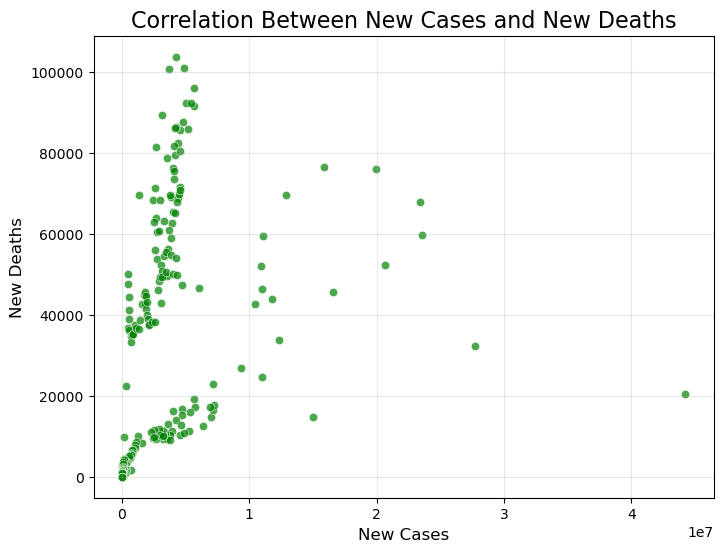

In [65]:
# Bước 2: Lọc các cột liên quan đến phân tích tương quan
correlation_data = World_data[['new_cases', 'new_deaths', 'total_cases', 'total_deaths']]

# Bước 3: Tính toán ma trận tương quan
correlation_matrix = correlation_data.corr()



# --- Biểu đồ Tương quan giữa Số Ca Nhiễm Mới và Số Ca Tử Vong Mới ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=World_data, x='new_cases', y='new_deaths', color='green', alpha=0.7)
plt.title('Correlation Between New Cases and New Deaths', fontsize=16)
plt.xlabel('New Cases', fontsize=12)
plt.ylabel('New Deaths', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

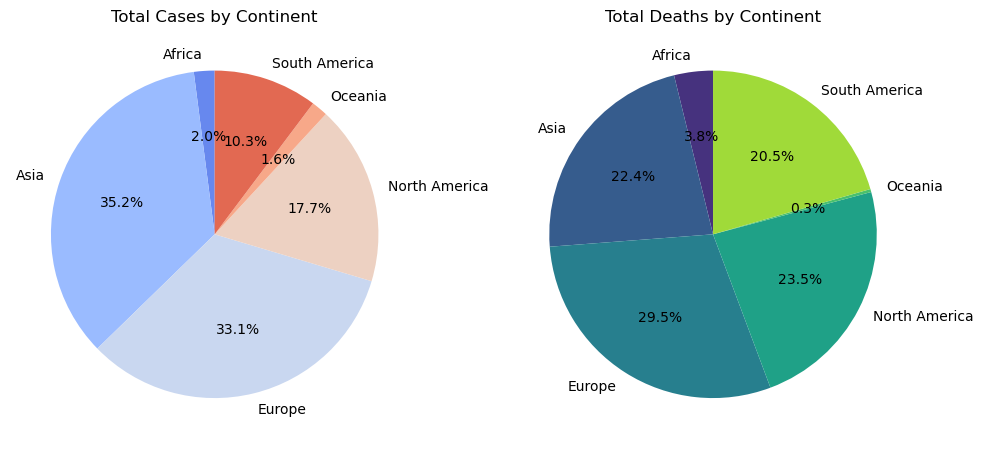

In [66]:
# Bước 1: Lọc và nhóm dữ liệu theo châu lục
df_grouped = country_data.groupby('continent').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()

# --- Biểu đồ Tròn: Tỷ lệ Ca Nhiễm và Ca Tử Vong theo Châu Lục ---
plt.figure(figsize=(10, 6))

# Biểu đồ Tròn cho số ca nhiễm
plt.subplot(1, 2, 1)
plt.pie(df_grouped['total_cases'], labels=df_grouped['continent'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(df_grouped)))
plt.title('Total Cases by Continent')

# Biểu đồ Tròn cho số ca tử vong
plt.subplot(1, 2, 2)
plt.pie(df_grouped['total_deaths'], labels=df_grouped['continent'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df_grouped)))
plt.title('Total Deaths by Continent')

plt.tight_layout()
plt.show()




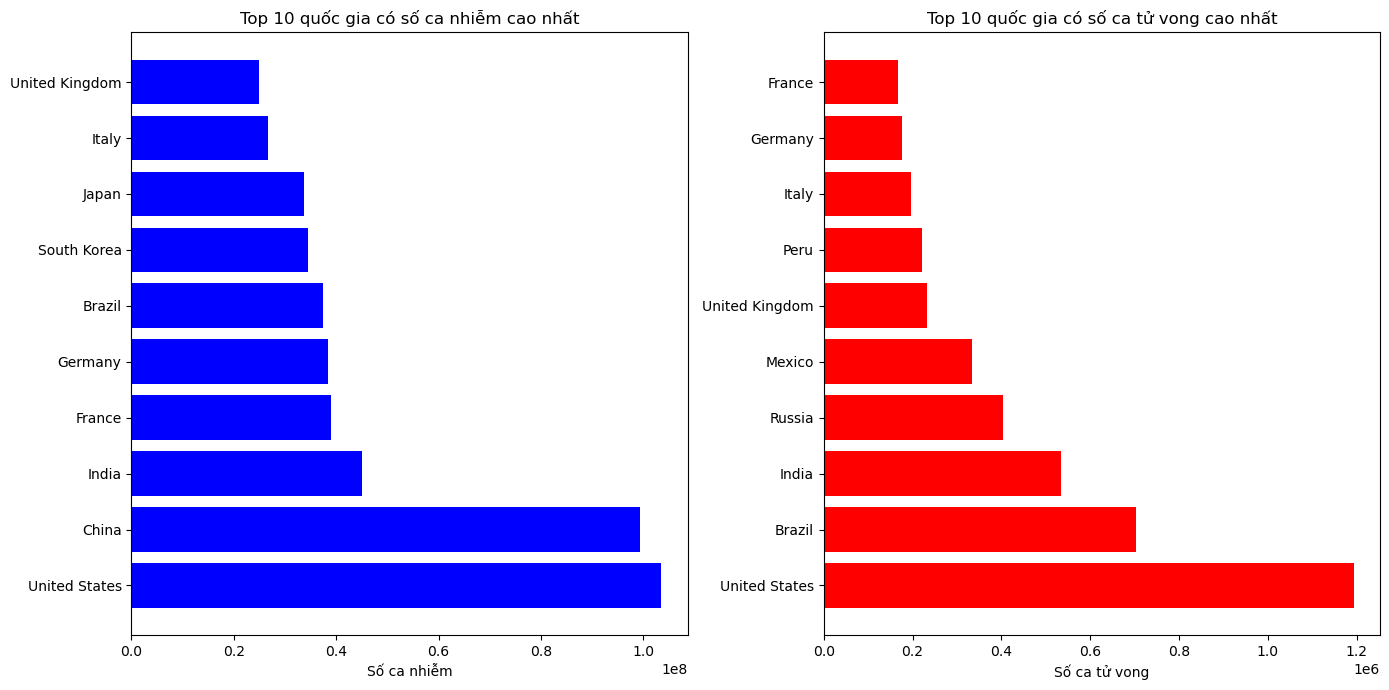

In [67]:
# Lọc 10 quốc gia có số ca nhiễm và tử vong cao nhất
top_countries_cases = country_data.groupby('location')['total_cases'].max().nlargest(10)
top_countries_deaths = country_data.groupby('location')['total_deaths'].max().nlargest(10)

# Vẽ biểu đồ cột cho các quốc gia
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Biểu đồ cột cho số ca nhiễm
ax[0].barh(top_countries_cases.index, top_countries_cases.values, color='blue')
ax[0].set_title('Top 10 quốc gia có số ca nhiễm cao nhất')
ax[0].set_xlabel('Số ca nhiễm')

# Biểu đồ cột cho số ca tử vong
ax[1].barh(top_countries_deaths.index, top_countries_deaths.values, color='red')
ax[1].set_title('Top 10 quốc gia có số ca tử vong cao nhất')
ax[1].set_xlabel('Số ca tử vong')

plt.tight_layout()
plt.show()


In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Đồ thị với trục x được điều chỉnh
plt.figure(figsize=(12, 6))

# Vẽ đường cho biến thể Delta và Omicron
plt.plot(delta_wave_world['date'], delta_wave_world['new_deaths'], label='Delta Wave', color='red')
plt.plot(omicron_wave_world['date'], omicron_wave_world['new_deaths'], label='Omicron Wave', color='green')

# Tiêu đề và nhãn
plt.title('So sánh số ca tử vong COVID-19 giữa biến chủng Delta và Omicron (Toàn cầu)', fontsize=14)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số ca tử vong mới', fontsize=12)
plt.legend()

# Định dạng trục x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Hiển thị mỗi tháng
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))  # Định dạng tháng-năm

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45)

# Thêm lưới
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


NameError: name 'delta_wave_world' is not defined

<Figure size 1200x600 with 0 Axes>

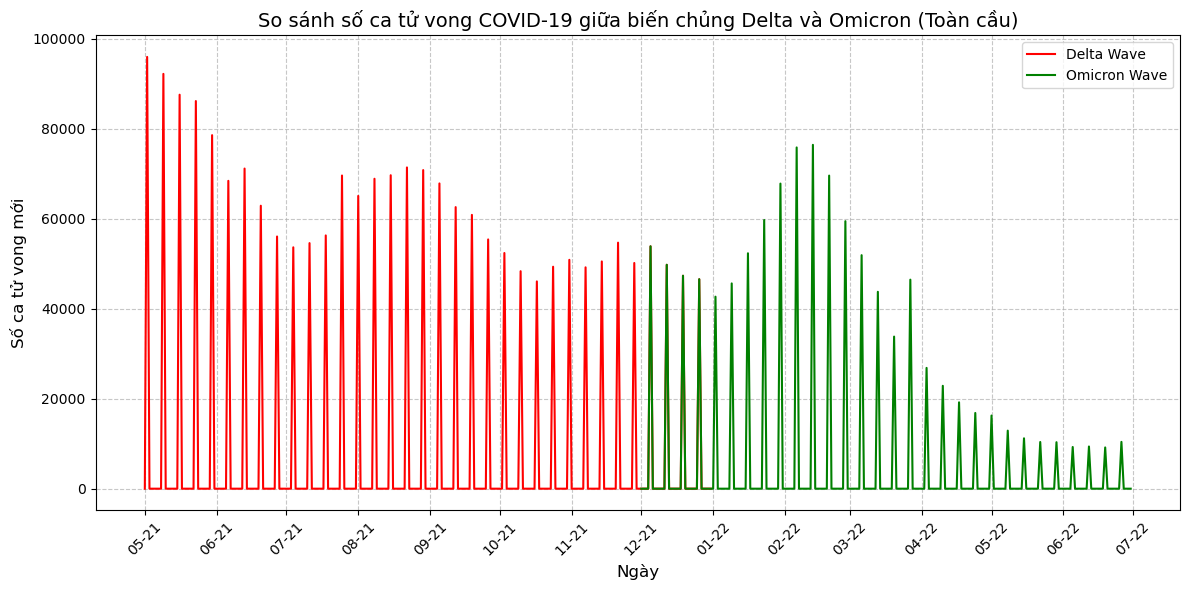

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Đồ thị so sánh số ca tử vong giữa biến thể Delta và Omicron
plt.figure(figsize=(12, 6))

# Vẽ đường cho biến thể Delta và Omicron
plt.plot(delta_wave_world['date'], delta_wave_world['new_deaths'], label='Delta Wave', color='red')
plt.plot(omicron_wave_world['date'], omicron_wave_world['new_deaths'], label='Omicron Wave', color='green')

# Tiêu đề và nhãn trục
plt.title('So sánh số ca tử vong COVID-19 giữa biến chủng Delta và Omicron (Toàn cầu)', fontsize=14)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số ca tử vong mới', fontsize=12)

# Thêm chú thích
plt.legend()

# Định dạng trục x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Hiển thị mỗi tháng
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))  # Định dạng tháng-năm

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45)

# Thêm lưới
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


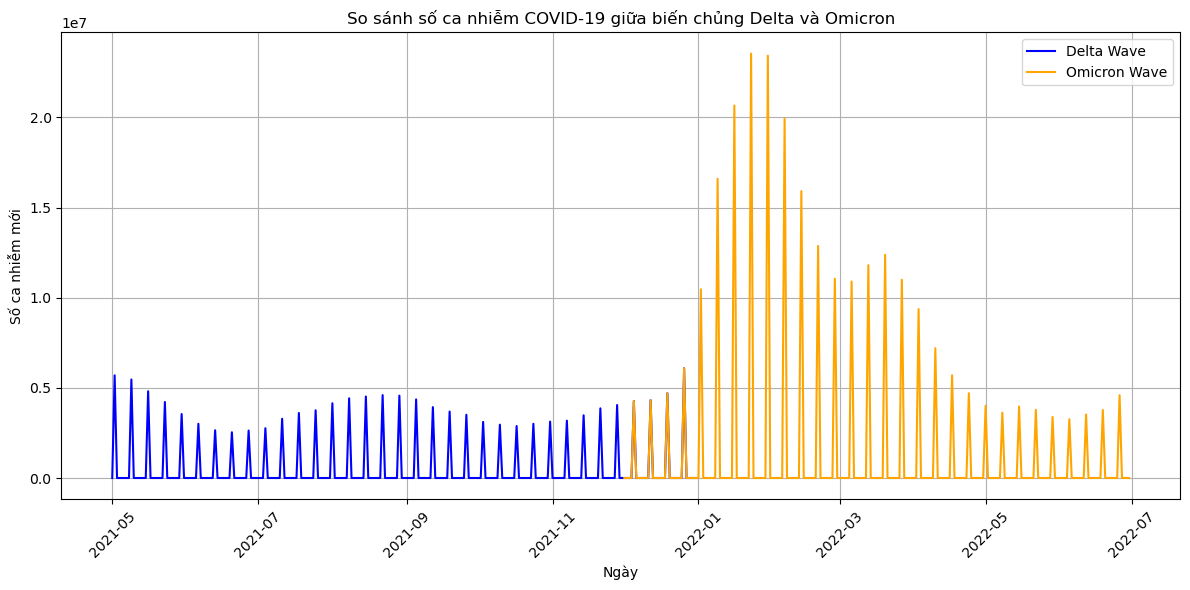

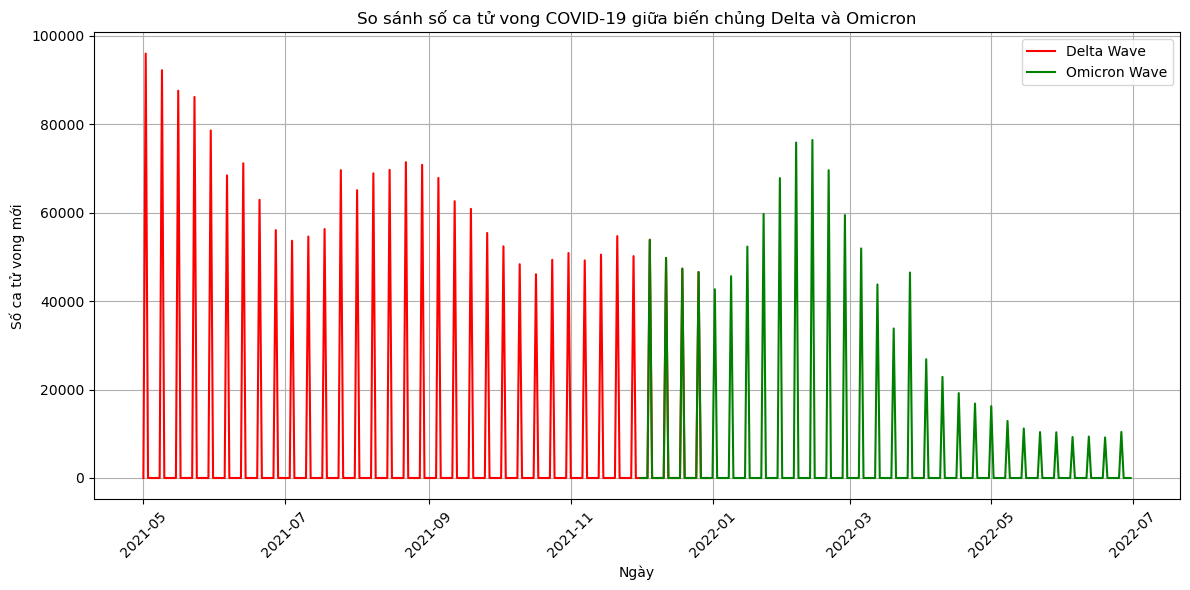

In [ ]:
import matplotlib.pyplot as plt

# Lọc dữ liệu cho biến chủng Delta (từ tháng 5/2021 đến tháng 12/2021)
delta_wave = World_data[(World_data['date'] >= '2021-05-01') & (World_data['date'] <= '2021-12-31')]

# Lọc dữ liệu cho biến chủng Omicron (từ tháng 12/2021 đến giữa năm 2022)
omicron_wave = World_data[(World_data['date'] >= '2021-12-01') & (World_data['date'] <= '2022-06-30')]

# --- So sánh số ca nhiễm COVID-19 giữa biến chủng Delta và Omicron ---
plt.figure(figsize=(12, 6))
plt.plot(delta_wave['date'], delta_wave['new_cases'], label='Delta Wave', color='blue')
plt.plot(omicron_wave['date'], omicron_wave['new_cases'], label='Omicron Wave', color='orange')
plt.title('So sánh số ca nhiễm COVID-19 giữa biến chủng Delta và Omicron')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- So sánh số ca tử vong COVID-19 giữa biến chủng Delta và Omicron ---
plt.figure(figsize=(12, 6))
plt.plot(delta_wave['date'], delta_wave['new_deaths'], label='Delta Wave', color='red')
plt.plot(omicron_wave['date'], omicron_wave['new_deaths'], label='Omicron Wave', color='green')
plt.title('So sánh số ca tử vong COVID-19 giữa biến chủng Delta và Omicron')
plt.xlabel('Ngày')
plt.ylabel('Số ca tử vong mới')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


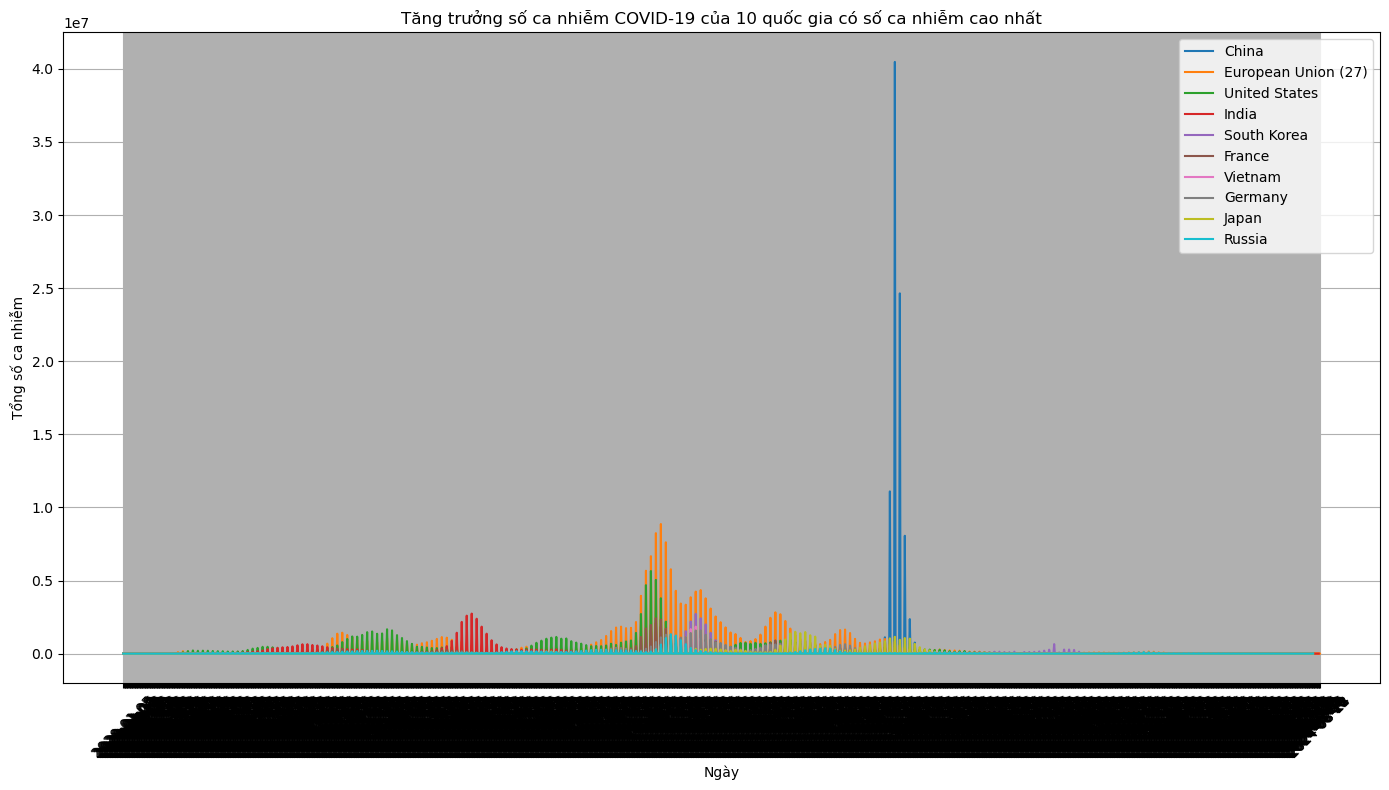

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Bước 1: Lọc top 10 quốc gia có tổng số ca nhiễm cao nhất
top_10_countries = country_data.groupby('location')['new_cases'].max().nlargest(10).index

# Bước 2: Lọc dữ liệu cho các quốc gia đó
top_10_data = country_data[country_data['location'].isin(top_10_countries)]

# Bước 3: Vẽ biểu đồ đường
top_10_data = country_data[country_data['location'].isin(top_10_countries)]

# Bước 3: Vẽ biểu đồ đường tăng trưởng số ca nhiễm theo thời gian cho từng quốc gia
plt.figure(figsize=(14, 8))
for country in top_10_countries:
    country_cases = top_10_data[top_10_data['location'] == country]
    plt.plot(country_cases['date'], country_cases['new_cases'], label=country)

# Tùy chỉnh biểu đồ
plt.title('Tăng trưởng số ca nhiễm COVID-19 của 10 quốc gia có số ca nhiễm cao nhất')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca nhiễm')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Bước 1: Đọc file CSV chứa thông tin lãnh thổ
territory_info_path = 'country-codes.csv'  # Thay đường dẫn thực tế
df_territory = pd.read_csv(territory_info_path)

# Bước 2: Đọc dữ liệu COVID-19 từ Our World in Data
url = 'Countries_data.csv'  # Thay đường dẫn thực tế
country_data = pd.read_csv(url)

# Bước 3: Lấy tổng số ca tử vong lớn nhất cho mỗi quốc gia
df_deaths = country_data.groupby('iso_code')['total_deaths'].max().reset_index()

# Bước 4: Kết hợp dữ liệu COVID-19 với thông tin lãnh thổ (dựa trên mã quốc gia)
df_merged = df_deaths.merge(df_territory, left_on='iso_code', right_on='ISO3166-1-Alpha-3', how='left')

# Đổi tên cột để dễ thao tác (tùy theo file của bạn)
if 'region' in df_merged.columns:
    df_merged.rename(columns={'region': 'continent'}, inplace=True)
elif 'continent' not in df_merged.columns:
    raise ValueError("Dữ liệu không chứa thông tin châu lục. Hãy kiểm tra lại file đầu vào.")

# Bước 5: Tạo và hiển thị bản đồ choropleth riêng cho từng châu lục
continents = df_merged['continent'].dropna().unique()  # Lấy danh sách các châu lục

for continent in continents:
    df_continent = df_merged[df_merged['continent'] == continent]  # Lọc dữ liệu cho từng châu
    
    fig = px.choropleth(df_continent,
                        locations='iso_code',
                        color='total_deaths',
                        hover_name='official_name_en',
                        color_continuous_scale='Reds',
                        title=f'COVID-19 Heatmap for {continent} (Max Total Deaths per Country)',
                        projection='natural earth')  # Bản đồ châu lục
    
    fig.show()


ValueError: Dữ liệu không chứa thông tin châu lục. Hãy kiểm tra lại file đầu vào.